# Fundamentos em Data Science

## Redes Neurais Artificiais

Fábio Sato <fabiosato@gmail.com>

# Redes Neurais Artificiais (ANN) - Introdução

Inspiração no cérebro humano para a construção de algoritmos inteligentes

Algoritmos versáteis, poderosos e escaláveis que podem lidar com tarefas complexas de aprendizado de máquina

Base para o Aprendizado Profundo (*Deep Learning*):
- Classificação de imagens (Google Image)
- Reconhecimento de fala (Siri)
- Recomendação de vídeos (Youtube e Netflix)






# Neurônios Biológicos

Composto por um corpo celular contendo o núcleo, ramificações (dendritos) e uma longa extensão denominada axônio.

O axônio apresenta ramificações em suas extremidades que possuem pequenas estruturas denominadas terminais sinápticos (sinapses) que estão conectadas aos dendritos de outros neurônios.

Recebem curtos impulsos elétricos (sinais) de outros neurôrios através das sinapses.

# Neurônios Biológicos

![Neurônio Biológico](figuras/biological-neuron.jpg)

# Neurônios Biológicos

Quando um neurônio recebe um número suficiente de sinais de outros neurônios dentro 
de alguns milisegundos ele dispara seu próprio sinal.

Neurônios individuais se comportam de forma bastante simples, mas estão organizados em uma vasta rede de bilhões de neurônios, onde cada neurônio está conectado a milhares de outros neurônios.

"Cálculos" altamente complexos podem ser realizados por uma vasta rede de simples neurônios.



# Neurônios Biológicos

![Biological Neurons Layers](figuras/biological-neurons-layers.png)

# ANN - Histórico

## 1943 - McCulloch e Pitts

*A Logical Calculus of Ideas Immanent in Nervous Activity*: Primeira arquitetura de redes neurais artificiais.

Modelo computacional simplificado de como neurônios biológicos podem trabalhar em conjunto para realizar operações complexas.

Uma ou mais entradas binárias (ligado/desligado) e uma saída binária. Ativação da saída quando mais do que um certo número de entradas estão ativas.

# ANN - Neurônio de McCulloch e Pitts

![McCulloch and Pitts Model](figuras/mcculloch-pitts.gif)

# ANN - Histórico

## 1957: Frank Rosenblat

Proposta de um neurônio artifical ligeiramente modificado.

LTU - *Linear Treshold Unit* - entradas e saídas são números e um peso é associado a cada conexão de entrada.

Cálculo da soma ponderada das entradas: $ z = w_1 x_1 + w_2 x_2 + ... + w_n x_n = \mathbf{w}^T \cdot \mathbf{x}$

Função de *step* sobre o soma que produz na saída o resultado $h_w(\mathbf{x}) = step(z)$

# ANN - LTU

![Perceptron](figuras/perceptron.png)

# LTU - Funções Step


$$ heaviside(z) = 
\begin{cases}
0 & if z \lt 0 \\
1 & if z \ge 0
\end{cases} $$

$$ sign(z) = 
\begin{cases}
-1 & if z \lt 0 \\
0  & if z = 0 \\
+1 & if z \gt 0
\end{cases}
$$

# Perceptron

Combinação linear das entradas: LTU pode ser usado somente para problemas simples de classificação binária linear.

Um Perceptron consiste de uma camada simples de LTUs onde cada neurônio está conectado a todas entradas.

As conexões de entrada são compostas por neurônios que reproduzem os valores na saída. Um neurônio de viés (*bias*) é geralmente adicionado ($x_0 = 1$) na entrada.

Perceptrons não são capazes de aprender padrões complexos. Entretanto, Rosenblat demonstrou que se o problema é linearmente separável o algoritmo irá convergir para uma solução.



# Perceptron - Treinamento

Baseado na regra de Hebb: quando um neurônio frequentemente ativa outro a conexão entre eles fica mais forte.

Perceptrons são treinados de forma que o erro produzido pela rede seja levado em consideração.

Não reforça conexões que conduziram a uma saída errada.

Para cada instância de treinamento o erro da rede é determinado e os pesos são atualizados de forma que as conexões de entradas que poderiam ter contribuido para uma saída correta sejam reforçadas.

# Perceptron - Regra de Aprendizado

$$ w_{i,j}^{(next step)} = w_{i, j} + \eta (\hat{y_i} - y_i)x_i $$

- $w_{i,j}$ é o peso da conexão entre o $i$-ésimo neurônio de entrada e o $j$-ésimo neurônio de saída
- $x_i$ é o $i$-ésimo valor de entrada da instância de treinamento atual
- $\hat{y_i}$ é a saída do $j$-ésimo neurônio de saída para a instância de treinamento atual
- $y_i$ é o valor de saída alvo do $j$-ésimo neurônio de saída para a instância de treinamento atual
- $\eta$ é a taxa de aprendizado

# Perceptron - Exemplo

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

clf = Perceptron(random_state=1234)
clf.fit(X, y)

y_pred = clf.predict(X)
print("Acurácia: %f" % accuracy_score(y, y_pred))

Acurácia: 1.000000


/Users/sato/treinamentos/fundamentos-data-science/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


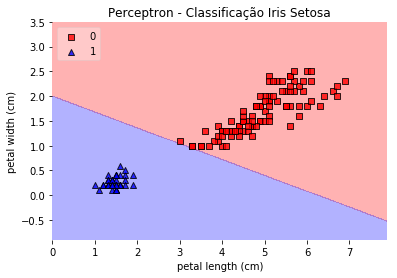

In [4]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, res=0.01, legend=2)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Perceptron - Classificação Iris Setosa')
plt.show()

# MLP - Multi-Layer Perceptron

1969 - Minksy e Papert: limitações do Perceptron (XOR)

MLP: algumas das limitações podem ser eliminadas através do empilhamento de múltiplos Perceptrons.

Uma MLP é composta por uma ou mais camadas de entrada, um ou mais camadas de LTUs (camadas escondidas), e uma camada final de LTUs chamada de camada de saída.

Quando uma ANN possui duas ou mais camadas escondidas é denominada rede neural profunda (DNN - *Deep Neural Network*)



# MLP - Multi-Layer Perceptron

![MLP](figuras/mlp-network.png)

# MLP - Treinamento

Por muitos anos um desafio na pesquisa foi encontrar um método para realizar o treinamento de MPLs. Em 1986 Rumelhart et al. publicaram um artigo introduzindo o algoritmo de treinamento *Backpropagation*.

Combinação de Gradiente Descendente e Diferenciação Automática (obtenção de derivadas de uma função).

Para cada instância o algoritmo alimenta a rede e calcula a saída de cada neurônio. O erro da rede é medido e calcula-se o quanto cada neurônio na última camada escondida contribuiu para o erro.

# MLP - FeedForward e Backpropagation

![Feedforward - Backpropagation](figuras/mlp-feedforward-backpropagation.png)

# MLP - Backpropagation

<img src="figuras/mlp-backpropagation.jpg" width="65%">

# MLP: Funções de Ativação

- Para que o algoritmo de backpropagation funcione adequadamente os autores fizeram uma mudança chave na arquitetura da MLP substituindo a função de ativação.

- A função de step foi substituída pelo sigmóide. A função de step não é diferenciável, enquanto a função logistic possui uma derivada não-nula em todos os pontos da curva

- O algoritmo de backpropagation pode ser utilizado com outras funções deriváveis, para que o algoritmo de Gradiente Descendente possa funcionar em todos os passos do treinamento

# Funções de Ativação: Sigmóide

![Sigmoid](figuras/mlp-sigmoid.png)

# Funções de Ativação: Tangente Hiperbólico

- Também apresenta uma curva em forma de como o sigmóide;
- Faixa de variação da saída entre -1 e 1
- Normalização das saídas das camadas de neurônios
- Melhora a convergência do backpropagation


![MLP Tanh](figuras/mlp-tanh.png)

# Funções de Ativação: ReLU

- $ReLU(z) = max(0,z)$. É contínuo porém não é diferenciável em $z = 0$. Entretanto, na prática, funciona muito bem e tem a vantagem de ser muito mais rápido de calcular
- O fato de não possuir um limite máximo de saída também ajuda a reduzir alguns problemas com o Gradiente Descendente

![MLP ReLU](figuras/mlp-relu.png)

# Funções de Ativação: SoftMax

- Em problemas de classificação a camada de saída é geralmente modificada substituindo as funções de ativação
individuais por uma função compartilhada de *softmax*.

- A saída de cada neurônio corresponde a probabilidade estimada da classe correspondente
    

# Classificação - Softmax

![MLP Softmax](figuras/mlp-softmax.png)

# MLP - Como Ajustar?

- A flexibilidade das redes neurais é também um dos seus principais problemas: muitos hiper-parâmetros para ajustar
- Número de camadas escondidas
- Número de neurônios em cada camada
- Tipo de função de ativação
- Lógica de inicialização dos pesos
- Taxa de aprendizado

# MLP - Número de Camadas e de Neurônios

- Iniciar com uma simples camada
- Número de neurônios igual a metade do número de características de entrada
- Aumentar o número de neurônios até que a rede apresente overfitting
- Para problemas mais complexos é necessário aumentar o número de camadas escondidas -> Deep Learning

# MLP - Função de Ativação

- Nas camadas escondidas utilize ReLU
- Para problemas de classificação utilizar SoftMax na camda de saída
- Para problemas de regressão utilizar ReLu

![TensorFlow](figuras/tensorflow.png)

TensorFlow é uma biblioteca de código aberto desenvolvido pelo Google para aprendizado de máquina.

Cálculos no TensorFlow são expressos como grafos de fluxo de dados (tensores).

É um NumPy com esteróides. Execução distribuída em CPUs e GPUs.

<img src="figuras/keras.jpg" width="20%">

Keras é uma API de alto nível para desenvolvimento de redes neurais profundas em Python e capaz de rodar em cima do
TensorFlow, CNTK ou Theano.

Permite prototipação rápida e fácil e foi desenvolvida com foco na velocidade de experimentação.

Suporta redes convolucionárias e recorrentes, assim como combinação das duas.

In [14]:
# MLP - Exemplo

In [16]:
!pip install tensorflow
!pip install keras

In [29]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy:', score[1])

RuntimeError: You must compile your model before using it.